Try using image based optimization

# Import

In [1]:
import os
import sys
import time
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.transforms.functional as F
from IPython.core.debugger import set_trace
from PIL import Image

In [2]:
sys.path.append('../../')

In [3]:
from style_transfer.data import *
from style_transfer.models import *

# Config

In [4]:
dir_data = Path('../../data')
dir_styl = dir_data/'style'
dir_cont = dir_data/'content'

# Utility

In [5]:
def resize_centercrop(img, sz):
    img = F.resize(img, sz)
    img = F.center_crop(img, sz)
    return img

# Train

In [6]:
img_cont = Image.open(dir_cont/'artists'/'layne.jpg')
img_styl = Image.open(dir_styl/'rainy.jpg')
sz = 256

In [7]:
img_cont = resize_centercrop(img_cont, sz)
img_styl = resize_centercrop(img_styl, 512)

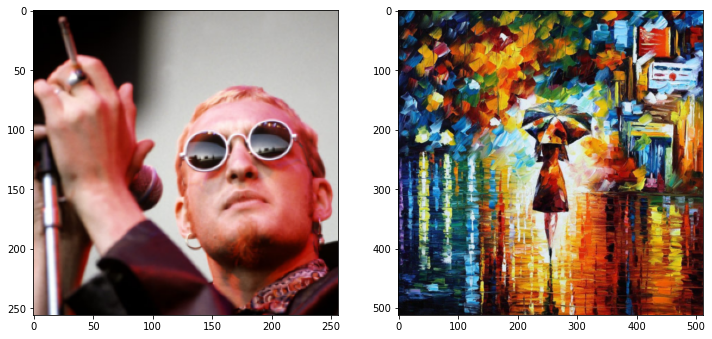

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12,6))
axs[0].imshow(img_cont)
axs[1].imshow(img_styl)

Initialize combined image

In [9]:
img_cont = img2tensor(img_cont)
img_xfer = torch.rand_like(img_cont, requires_grad=True)

Get stuff for optimization

In [10]:
optimizer = optim.Adam([img_xfer], lr=1e-1)

In [11]:
def _update():
    optimizer.zero_grad()
    l, metrics = loss(img_xfer, img_cont)            
    l.backward()
    optimizer.step()
    return metrics

In [12]:
def _fit(num_epochs, step=50):     
    %matplotlib notebook
    
    fig, ax = plt.subplots(1, 1)
    for num_epoch in range(num_epochs):
        metrics = _update()
        if num_epoch % step == 0:
            print(pd.DataFrame(metrics, index=[num_epoch]).to_string(header=num_epoch == 0,
                                                                     float_format=lambda x: f'{x:14.2f}',
                                                                     col_space=8))       
            ax.imshow(denorm(torch2np(img_xfer[0])))
            fig.canvas.draw()
        
    %matplotlib inline

<IPython.core.display.Javascript object>


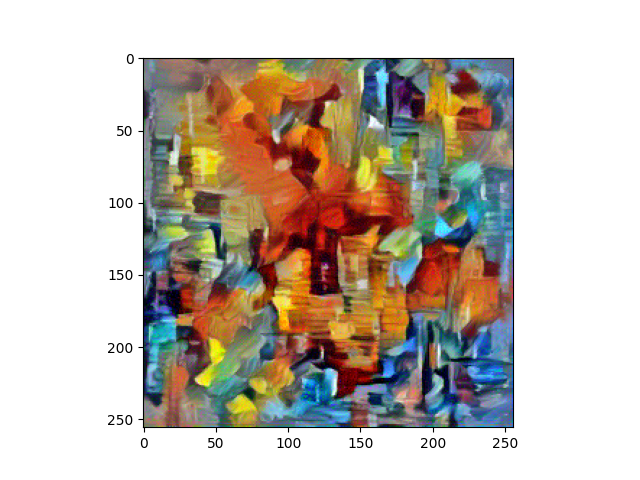

                      l        ls_s[0]        ls_s[1]        ls_s[2]        ls_s[3]        ls_s[4]        ls_c[0]
0              81422.62       16211.05       41071.16       24000.39         136.14           3.89           0.00
50              3641.53        2742.92         535.19         334.65          26.54           2.23           0.00
100             1634.16        1234.39         218.52         162.47          17.07           1.71           0.00
150              926.26         587.33         164.97         158.34          14.04           1.58           0.00
200              570.31         343.97         105.83         106.93          12.14           1.44           0.00
250              443.07         230.75          89.07         110.44          11.41           1.39           0.00
300              313.96         169.35          58.08          74.83          10.37           1.32           0.00
350              276.63         137.46          53.73          73.82          10.31     

In [13]:
loss = FeatureLoss(models.vgg16(pretrained=True).features, 
                   img_styl, 
                   sz, 
                   [0,1,2,3,4], 
                   [2],
                   [1e8, 1e8, 1e8, 1e8, 1e8],
                   [0])
_fit(1500)

<IPython.core.display.Javascript object>


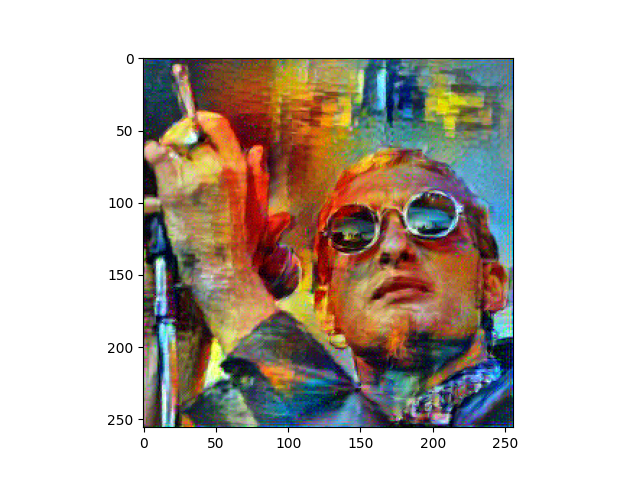

                      l        ls_s[0]        ls_s[1]        ls_s[2]        ls_s[3]        ls_s[4]        ls_c[0]
0              32905.43          17.03           9.07          28.65           6.78           1.06       32842.84
50             11021.30         344.96         434.31        1665.93          76.16          12.21        8487.73
100             8775.91         203.28         300.78        2038.45          82.70           9.76        6140.94
150             7996.79         161.49         246.00        1948.58          82.15          10.20        5548.37
200             7616.19         146.69         224.51        1870.51          84.61          10.06        5279.82
250             7459.67         138.11         205.27        1679.32          83.37          11.09        5342.51
300             7295.15         123.98         210.65        2136.39          84.50           9.71        4729.91
350             7092.69         118.13         189.21        1951.15          84.93     

In [14]:
loss = FeatureLoss(models.vgg16(pretrained=True).features, 
                   img_styl, 
                   sz, 
                   [0,1,2,3,4], 
                   [2],
                   [1e8, 1e8, 1e8, 1e8, 1e8],
                   [1e3])
_fit(750)

<IPython.core.display.Javascript object>


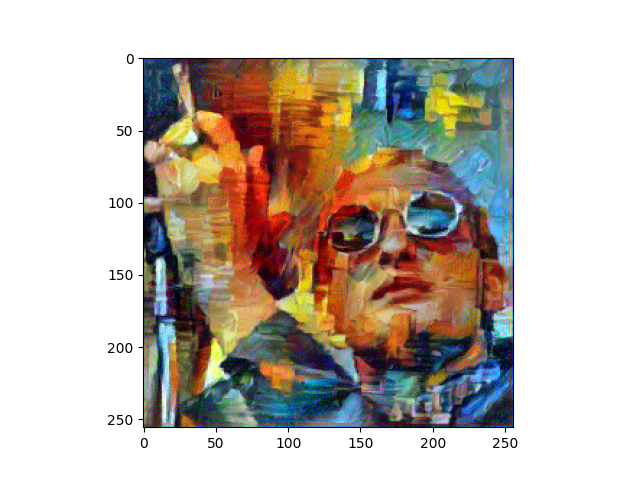

                      l        ls_s[0]        ls_s[1]        ls_s[2]        ls_s[3]        ls_s[4]        ls_c[0]
0               2377.55          89.82         166.70        2025.68          85.71           9.64           0.00
50               201.94          48.94          42.92          95.57          12.85           1.66           0.00
100              112.01          27.02          20.87          52.84           9.86           1.41           0.00
150               80.53          20.19          12.54          37.85           8.66           1.28           0.00
200               77.28          16.66          10.62          40.43           8.31           1.27           0.00


In [15]:
loss = FeatureLoss(models.vgg16(pretrained=True).features, 
                   img_styl, 
                   sz, 
                   [0,1,2,3,4], 
                   [2],
                   [1e8, 1e8, 1e8, 1e8, 1e8],
                   [0])
_fit(250)